In [7]:
#Import Pandas and Numpy for data handling 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from wordcloud import WordCloud, STOPWORDS
from matplotlib import rcParams

In [5]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#Specify offline plotly mode
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## The analysis steps are as follows:

1. Pose questions

2. Get a gist of the data

3. Data cleaning and manipulation(if necessary)

4. Build models

5. Data visualization

## 1. PROPOSE QUESTIONS

(1) Compare the strategies adopted by different brands at the time of pricing from the data set, such as the average price and the price range, so as to roughly infer the consumer population of the brand audience.

(2) Understand the promotion of different brands

(3) Whether there is any correlation between different brands in setting prices and promotion efforts

(4) Which brand has the most concentrated price?

#### --> Pricing strategy of different brands (Expensive vs cheap)
#### --> Which brands give the largest discount?
#### --> Correlation between brand expense and discounts?
#### --> Brands with most reasonable prices and promotions

In [253]:
## Importing data.
df = pd.read_csv('Datafiniti_Womens_Shoes.csv')
df.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,NaN,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,"Silver,Cream Watercolor Floral",NaN,NaN,...,Overstock.com,NaN,NaN,NaN,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311,NaN
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Walmart.com,NaN,NaN,Standard,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Shoes,Shoes",Black,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903,NaN
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,Grey,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Walmart.com,NaN,NaN,Expedited,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045958,NaN


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
id                   10000 non-null object
dateadded            10000 non-null object
dateupdated          10000 non-null object
brand                10000 non-null object
categories           10000 non-null object
primarycategories    10000 non-null object
imageurls            10000 non-null object
keys                 10000 non-null object
name                 10000 non-null object
prices.amountmax     10000 non-null float64
prices.amountmin     10000 non-null float64
prices.color         10000 non-null object
prices.currency      10000 non-null object
prices.dateseen      10000 non-null object
prices.issale        10000 non-null bool
prices.size          10000 non-null object
prices.sourceurls    10000 non-null object
sizes                10000 non-null object
sourceurls           10000 non-null object
prices.amountavg     10000 non-null float64
dtypes: bool(1), float64(3), ob

## Let's define which columns are gonna be important for our analysis and subset and clean the data acoordingly
The key data fields are as follows:

brand
prices.amountmax
prices.amountmin
prices.availability
prices.isSale
prices.colour
returnpolicy

In [255]:
## Subset the data and clean the columns

df1 = df[['brand','prices.amountMax','prices.amountMin','prices.isSale','prices.availability','prices.color','prices.returnPolicy']]
df1.head(20)

,brand,prices.amountMax,prices.amountMin,prices.isSale,prices.availability,prices.color,prices.returnPolicy
0,Naturalizer,55.99,55.99,False,NaN,UWomens M Regular,NaN
1,MUK LUKS,47.00,35.25,True,In Stock,Grey,NaN
2,MUK LUKS,35.25,35.25,False,In Stock,Grey,NaN
3,MUK LUKS,24.75,24.75,False,In Stock,Black,NaN
4,MUK LUKS,33.00,30.39,True,In Stock,Grey,NaN
5,Soft Ones,14.00,7.90,True,In Stock,Brown Tweed,NaN
6,MUK LUKS,24.00,12.79,False,NaN,Purple,NaN
7,MUK LUKS,24.00,12.79,False,NaN,Brown,NaN
8,MUK LUKS,59.00,39.88,True,In Stock,Navy,NaN
9,MUK LUKS,59.00,47.99,True,In Stock,Brown,NaN


In [256]:
## Let's rename some of the columns for convenience and check the data completeness
df1.rename(columns={'prices.amountMax': 'amount_max'}, inplace=True)
df1.rename(columns={'prices.amountMin': 'amount_min'}, inplace=True)
df1.rename(columns={'prices.availability': 'availability'}, inplace=True)
df1.rename(columns={'prices.color': 'color'}, inplace=True)
df1.rename(columns={'prices.returnPolicy': 'returnpolicy'}, inplace=True)

In [257]:
## Replace nan values with 0
df1.replace(np.nan, 0, inplace= True)

[0 'In Stock' 'Out Of Stock' 'TRUE']


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Availability of Stock')

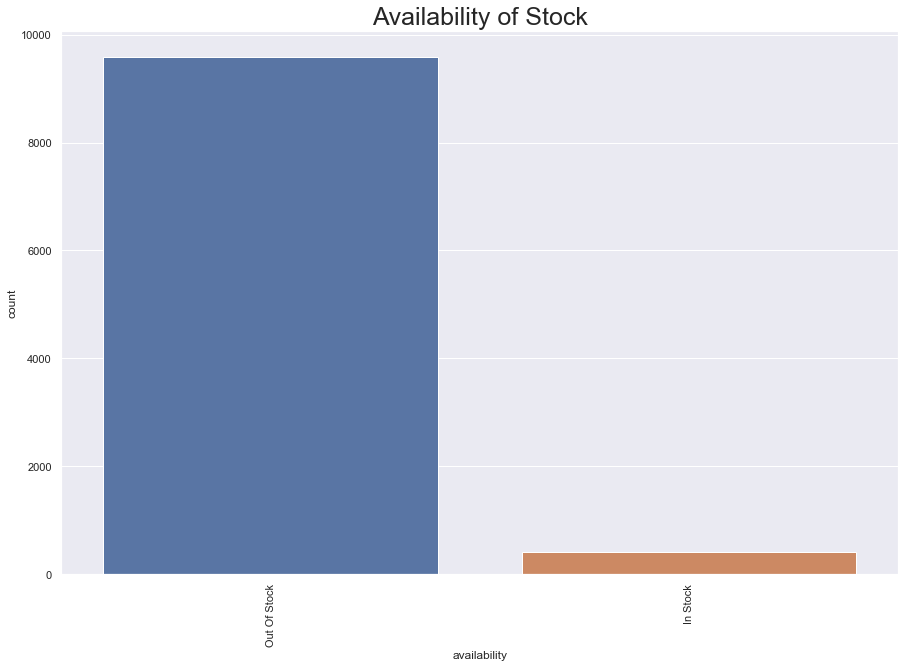

In [258]:
## Let's look into the availability column
print(df1.availability.unique())

## 0 and True look to be iterations of instock and outofstock so let's merge them
df1.loc[:, 'availability'].replace(['TRUE'], ['In Stock'], inplace=True)
df1.loc[:, 'availability'].replace([0], ['Out Of Stock'], inplace=True)

## Let's look at the distribution of the column now
plt.figure(figsize=(15, 10))
x = sn.countplot(df1['availability'])
x1 = plt.setp(x.get_xticklabels(), rotation=90)
plt.title('Availability of Stock', fontsize = 25)

##### Lot of data seems to be for out of stock options and it doesnt make sense to exclude this. 
##### Keeping all the data and moving on. Maybe we can perform analysis on in stock data later
##### Let's take a look at the brands and their distributions.

<Figure size 1800x1080 with 0 Axes>

Text(0.5, 1.0, 'Brands vs Volumes')

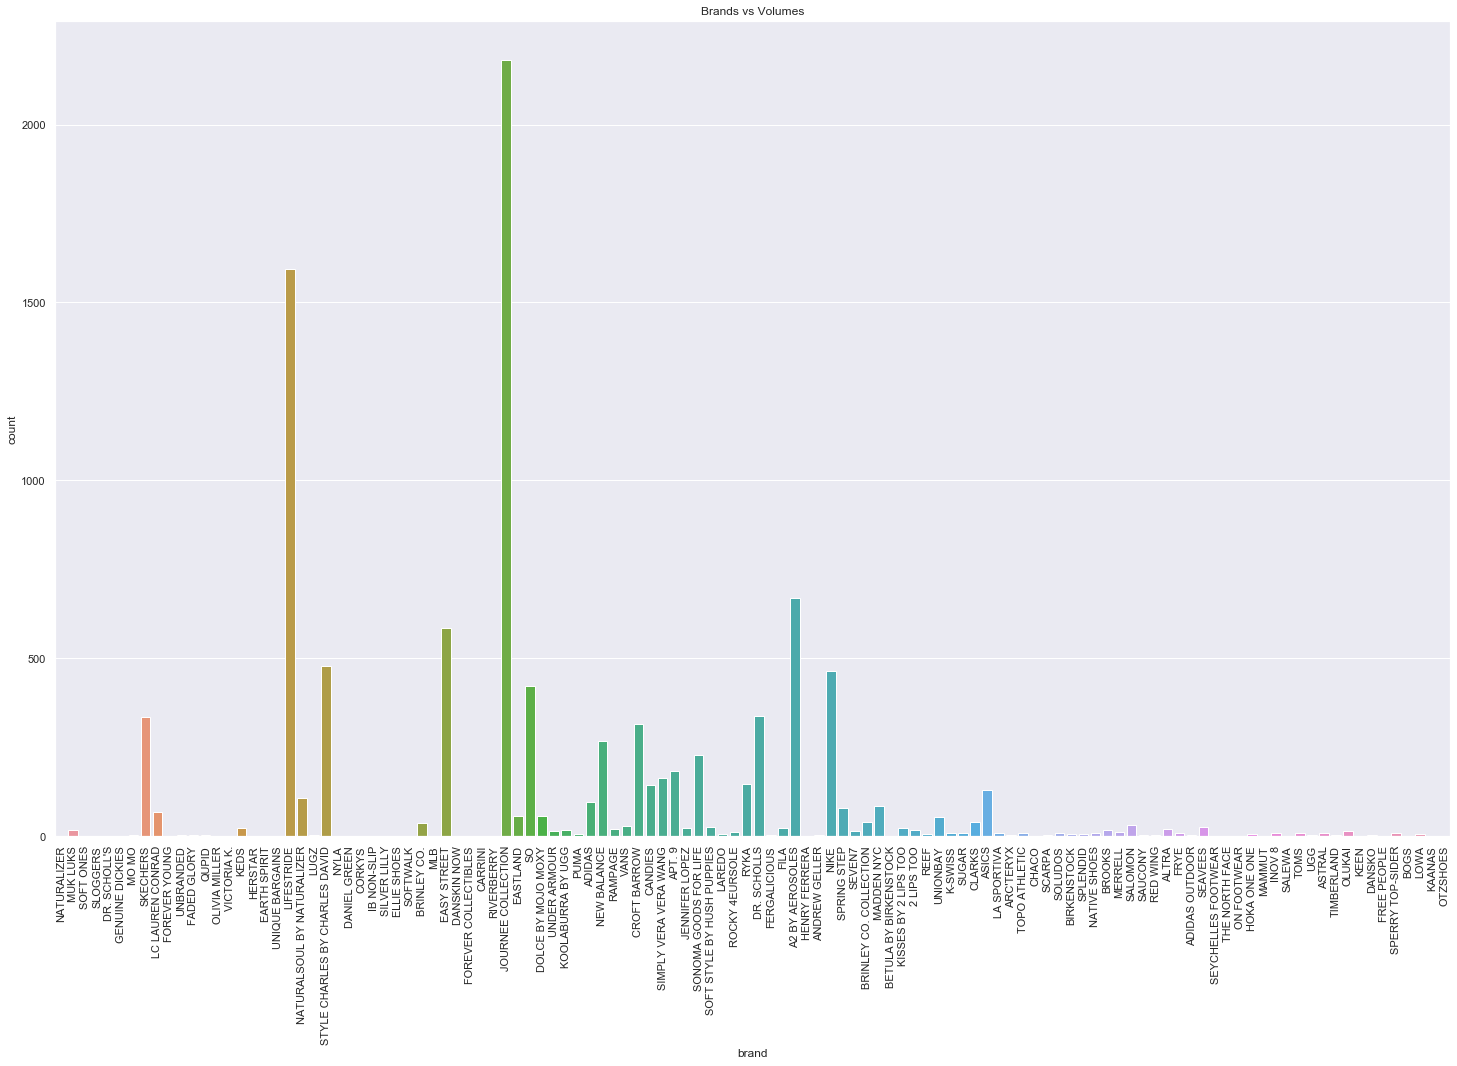

In [259]:
## Convert brand to uppercase to remove duplicates and ambiguity
df1.brand = df1.brand.str.upper()

## Brands and their counts
counts = df1.brand.value_counts().to_frame().reset_index().rename(columns={'index':'brand', 'brand':'volume'})

plt.figure(figsize=(25,15))
plt.title('Brands vs Volumes')
p = sn.countplot(df1['brand'])
p1 = plt.setp(p.get_xticklabels(), rotation=90)

In [50]:
## There are 116 unique brands
## Top 10 brands
df1.brand.value_counts()[:10].iplot(kind='bar', xTitle = 'Brand', yTitle = "Volume", title = 'Top 10 brands by volume', color = 'green')

Text(0.5, 1.0, 'Average Price of Brands')

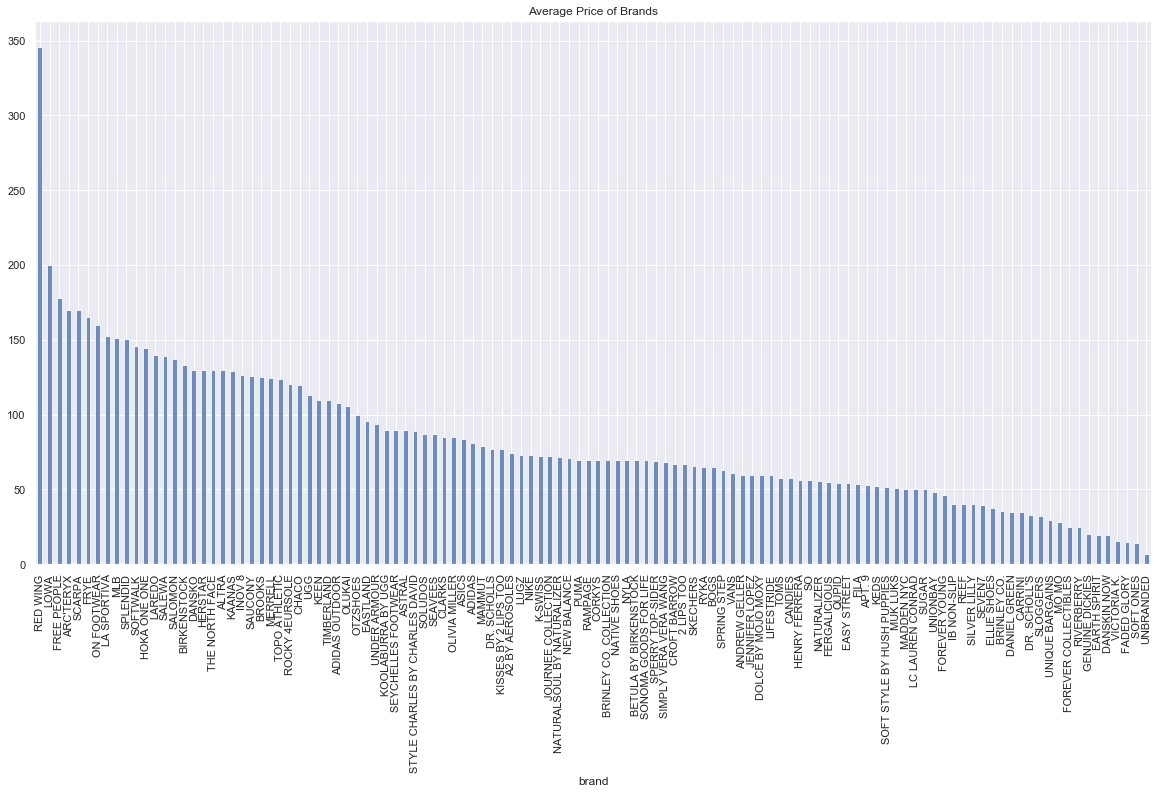

In [260]:
## Plot the average prices of every brand 
average=df1.groupby('brand')['amount_max'].mean().sort_values(ascending=False)
hist_data = [average]
import plotly.figure_factory as ff
group_labels = ['Average of max price distribution']
fig = ff.create_distplot(hist_data, group_labels)
fig.show()
fig = plt.figure(figsize=(20,10))
average.plot(kind='bar', align='center', alpha=.8)
plt.title('Average Price of Brands')

#### THe distribution suggests highest averages around the 70 dollars mark. We'll look at this in depth later

In [261]:
## plotting the distribution of the minimum and maximum shoe prices in the dataset. 
## This will allow us get a broad view of how minimum shoe prices are distributed in the dataset
## The distribution will be plotted with relative percentage on the Y axis

df1['amount_min'].iplot(
    kind='hist',
    bins=100,
    histnorm='percent',
    xTitle='Minimum Prices',
    linecolor='black',
    yTitle='Percentage',
    title='Minimum Price Distribution')

df1['amount_max'].iplot(
    kind='hist',
    bins=100,
    histnorm='percent',
    xTitle='Maximum Prices',
    linecolor='black',
    yTitle='Percentage',
    title='Maximum Price Distribution')

In [262]:
## For each brand, we will calculate the mean minimum price, median minimum price, 
## the lowest & highest minimum prices, and the range of the prices.
#Group data by brands
gb_brand = df1.groupby(['brand'])

##Get counts of each brand in the dataset
brand_counts = gb_brand.size().to_frame(name='min_counts')

#Get the statistics of each brand in the dataset
MinStats = brand_counts.join(gb_brand.agg({'amount_min': 'mean'}).rename(columns={'amount_min': 'amount_min_mean'})).join(gb_brand.agg({'amount_min': 'median'}).rename(columns={'amount_min': 'amount_min_median'})).join(gb_brand.agg({'amount_min': 'min'}).rename(columns={'amount_min': 'amount_min_min'})).join(gb_brand.agg({'amount_min': 'max'}).rename(columns={'amount_min': 'amount_min_max'})).reset_index()

In [268]:
## Some of the brands have just one product, and that may affect our result. 
## Hence, we will analyze on the brands with greater than 10 shoes listed

MinStats = MinStats[(MinStats.min_counts > 10)]

#Calculate range of minimum prices
MinStats['MinRange'] = MinStats.amount_min_max - MinStats.amount_min_min

In [269]:
MinStats.brand.value_counts().sum()

42

In [270]:
## Let us look at the brands whose median minimum prices are the most highest
MinStats.nlargest(10,'amount_min_median')

,brand,min_counts,amount_min_mean,amount_min_median,amount_min_min,amount_min_max,MinRange
15,BROOKS,19,119.951579,119.95,64.97,149.95,84.98
84,SALOMON,31,107.201613,119.95,65.97,149.95,83.98
4,ALTRA,21,111.669048,112.46,76.96,149.95,72.99
87,SEAVEES,26,84.724231,87.95,44.08,107.95,63.87
29,EASTLAND,56,76.166607,80.00,37.49,120.00,82.51
19,CLARKS,39,77.428974,79.99,59.99,85.00,25.01
51,KISSES BY 2 LIPS TOO,23,76.946522,79.99,69.99,79.99,10.00
52,KOOLABURRA BY UGG,18,82.490000,79.99,69.99,94.99,25.00
8,ASICS,130,79.322846,69.99,48.99,179.95,130.96
77,RAMPAGE,20,56.990000,69.99,31.99,69.99,38.00


#### We can see that Brooks, Salomon and Altra lead the pack. The only sneaker brand on the list is Asics

In [68]:
MinStats = MinStats.sort_values(by=['amount_min_median'],ascending = True)
MinStats.iplot(
    kind='bar',
    x = 'brand',
    y = 'amount_min_median',
    linecolor='black',
    yTitle='Median Minimum Prices',
    title='Median Minimum Price by brand'
    )

The shoe brand with the highest median minimum price is Brooks. Other brands with high such prices are Salomon and Altra. The lowest median minimum prices come from the following brands - Lauren Conrad, Apt 9 and J Lo by Jenifer Lopez.

Some brands with averagely priced minimum prices include Vans, Brinley Co. shoes and 2 lips shoes.


Among sneaker brands, we can see that the highest priced sneaker brand is Asics followed by Adidas and Nike. We then have Skechers, New Balance and Vans.


In [69]:
## Let us look at the range of minimum prices by brand ( That is the lowest minimum price subtracted from highest minimum price)
MinStats = MinStats.sort_values(by = 'MinRange',ascending = True)
MinStats.iplot(
    kind='scatter',
    x = 'brand',
    y = 'MinRange',
    mode = 'lines+markers',
    linecolor='black',
    yTitle='Range',
    title='Range of Minimum prices by brand',
    color='green'
    )

# 
As we can see, New balance has the highest range between minimum prices. Second is Asics and third is Adidas.

The brands with the lowest minimum price ranges include Soft Style by Hush Puppies, keds, Ugg, and, Clarks.


In [70]:
## For each brand, we will calculate the mean maximum price, median maximum price and the lowest & highest maximum prices, and the range of the maximum prices.

#Get the statistics of each brand in the dataset

MaxStats = brand_counts.join(gb_brand.agg({'amount_max': 'mean'}).rename(columns={'amount_max': 'amount_max_mean'})).join(gb_brand.agg({'amount_max': 'median'}).rename(columns={'amount_max': 'amount_max_median'})).join(gb_brand.agg({'amount_max': 'min'}).rename(columns={'amount_max': 'amount_max_min'})).join(gb_brand.agg({'amount_max': 'max'}).rename(columns={'amount_max': 'amount_max_max'})).reset_index()

In [72]:
#Again, reduce analysis to brands with over 15 products
MaxStats = MaxStats[(MaxStats.min_counts > 15)]

#Range of maximum prices
MaxStats['MaxRange'] = MaxStats.amount_max_max - MaxStats.amount_max_min

In [73]:
## Let us look at the brands whose median maximum prices are the most highest

MaxStats.nlargest(10,'amount_max_median')



,brand,min_counts,amount_max_mean,amount_max_median,amount_max_min,amount_max_max,MaxRange
4,ALTRA,21,129.950000,129.95,99.95,149.95,50.0
84,SALOMON,31,137.369355,129.95,119.95,159.95,40.0
15,BROOKS,19,125.213158,119.95,99.95,149.95,50.0
87,SEAVEES,26,86.796154,92.95,67.95,107.95,40.0
29,EASTLAND,56,96.071429,90.00,70.00,120.00,50.0
52,KOOLABURRA BY UGG,18,89.990000,89.99,79.99,99.99,20.0
103,STYLE CHARLES BY CHARLES DAVID,478,88.853556,89.00,69.00,119.00,50.0
19,CLARKS,39,85.000000,85.00,85.00,85.00,0.0
51,KISSES BY 2 LIPS TOO,23,76.946522,79.99,69.99,79.99,10.0
27,DR. SCHOLLS,337,77.091988,70.00,65.00,95.00,30.0


In [74]:
MaxStats = MaxStats.sort_values(by=['amount_max_median'],ascending = True)
MaxStats.iplot(
    kind='bar',
    x = 'brand',
    y = 'amount_max_median',
    linecolor='black',
    yTitle='Median Maximum Prices',
    title='Median Maximum Price by brand',
    color = 'pink'
    )

#
We can see that Altra and Salmon take top place with maximum median prices of $129 dollars. The other brand in the top three is Brooks, ensuring the top three is unchanged from the median minimum.

Asics and Rampage no longer appear in the top ten. New entries to the top ten brands with expensive shoe prices include Dr Scholls and Style Charles.

The shoes with the least median maximum prices include Hush Puppies, Union bay and Lauren Conrad.


In [75]:
MaxStats = MaxStats.sort_values(by = 'MaxRange',ascending = True)
MaxStats.iplot(
    kind='scatter',
    mode = 'lines+markers',
    x = 'brand',
    y = 'MaxRange',
    linecolor='black',
    yTitle='Range',
    title='Range of Maximum prices by brand',
    color = 'purple'
    
    )

# 
Again, sneaker brands dominate the brands with the highest range of maximum prices. Brands with average ranges include some of the most expensive like Brooks, Salomon and Altra. The brands with the low range are keds, Hush Puppies and union bay.

# Prices by Color

We will now proceed to view how women's shoes prices vary by color


In [79]:
#Group by color
gb_color = df1.groupby(['color'])

#Count each color
counts_colors = gb_color.size().to_frame(name='color_counts')

#Calculate color stats
colorstats_min = counts_colors.join(gb_color.agg({'amount_min': 'mean'}).rename(columns={'amount_min': 'amount_min_mean'})).join(gb_color.agg({'amount_min': 'median'}).rename(columns={'amount_min': 'amount_min_median'})).join(gb_color.agg({'amount_min': 'min'}).rename(columns={'amount_min': 'amount_min_min'})).join(gb_color.agg({'amount_min': 'max'}).rename(columns={'amount_min': 'amount_min_max'})).reset_index()

In [84]:
## We will analyze the colors that occur in more than 40 products for stability of result
#Calculate minimum price range
colorstats_min = colorstats_min[(colorstats_min.color_counts > 40)]
colorstats_min['range'] = colorstats_min.amount_min_max - colorstats_min.amount_min_min
colorstats_min.nlargest(10,'amount_min_median')

,color,color_counts,amount_min_mean,amount_min_median,amount_min_min,amount_min_max,range
473,Stucco,49,60.104898,59.990,31.99,95.00,63.01
199,Dark Gray,61,54.248525,59.990,19.99,99.99,80.00
516,Whiskey,53,55.391887,56.240,27.99,95.00,67.01
49,Black Gray,49,56.871429,55.990,39.99,85.00,45.01
460,Slate,63,61.959365,55.990,33.99,119.00,85.01
88,Black White,126,58.011905,55.115,24.99,80.00,55.01
426,Red,145,53.542759,52.490,15.88,125.00,109.12
177,Chestnut,109,51.353303,50.990,12.74,89.99,77.25
480,Tan,167,50.294132,49.990,11.04,178.00,166.96
356,Natural,65,51.675538,49.990,8.99,94.99,86.00


In [85]:
#bar plot of median minimum prices by color

colorstats_min = colorstats_min.sort_values(by=['amount_min_median'],ascending = True)

colorstats_min.iplot(
    kind='bar',
    x = 'color',
    y = 'amount_min_median',
    linecolor='black',
    yTitle='Median Minimum Prices',
    title='Median Minimum Price by color',
    color = 'silver'
    )

#
We can see that the highest median minimum price belong to shoes with colors Dark Gray and Stucco 

Many of the colors have relatively average median minimum prices with the lowest going to shoes with Burgundy and Mushroom colors.


In [141]:
color_brand = df1.groupby(['color', 'brand'])
counts_colors_brand = color_brand.size().to_frame(name='color_brand_counts')
counts_colors_brand = counts_colors_brand.reset_index()
counts_colors_brand = counts_colors_brand.sort_values(by='color_brand_counts', ascending = False).groupby('color')

In [145]:
counts_colors_brand.get_group('Whiskey')

,color,brand,color_brand_counts
911,Whiskey,DR. SCHOLLS,45
912,Whiskey,SONOMA GOODS FOR LIFE,8


In [86]:
colorstats_min = colorstats_min.sort_values(by = 'range',ascending = True)
colorstats_min.iplot(
    kind='scatter',
    mode = 'lines+markers',
    x = 'color',
    y = 'range',
    linecolor='black',
    yTitle='Range',
    title='Range of Minimum prices by colors'
    )

# 
Here, we can see that tan has the highest range of minimum prices. Followed by blue and black.

The lowest range belongs to Lux Navy, White black and white sand.

In [88]:
#Calculate color stats for maximum price

colorstats_max = counts_colors.join(gb_color.agg({'amount_max': 'mean'}).rename(columns={'amount_max': 'amount_max_mean'})).join(gb_color.agg({'amount_max': 'median'}).rename(columns={'amount_max': 'amount_max_median'})).join(gb_color.agg({'amount_max': 'min'}).rename(columns={'amount_max': 'amount_max_min'})).join(gb_color.agg({'amount_max': 'max'}).rename(columns={'amount_max': 'amount_max_max'})).reset_index()

In [89]:
#Focus on colors with over 40 products
colorstats_max = colorstats_max[(colorstats_max.color_counts > 40)]

#Calculate minimum price range
colorstats_max['range'] = colorstats_max.amount_max_max - colorstats_max.amount_max_min

In [91]:
#View top ten maximum prices by color
colorstats_max.nlargest(10,'amount_max_median')

,color,color_counts,amount_max_mean,amount_max_median,amount_max_min,amount_max_max,range
516,Whiskey,53,88.206038,95.00,65.00,95.00,30.00
460,Slate,63,96.475397,89.00,89.00,119.00,30.00
177,Chestnut,109,80.533945,84.99,32.99,99.99,67.00
64,Black Micro,63,71.741905,80.00,59.99,80.00,20.01
473,Stucco,49,81.530612,80.00,80.00,95.00,15.00
197,Dark Brown,51,74.524118,79.99,57.00,95.00,38.00
40,Black Fabric,69,75.207391,69.99,59.99,89.99,30.00
118,Blue,177,69.347571,69.99,19.99,149.95,129.96
137,Bone,49,65.830612,69.99,49.00,89.99,40.99
141,Brown,301,71.917608,69.99,19.97,119.00,99.03


In [92]:
colorstats_max = colorstats_max.sort_values(by=['amount_max_median'],ascending = True)

colorstats_max.iplot(
    kind='bar',
    x = 'color',
    y = 'amount_max_median',
    linecolor='black',
    yTitle='Median Maximum Prices',
    title='Median Maximum Price by color',
    color = 'blue'
    )

# 
We can see that Whiskey colored shoes have the highest median maximum prices. This is closely followed by Slate and chestnut colored shoes. At the bottom of the pile, we have blush and pewter colored shoes

In [93]:
colorstats_max = colorstats_max.sort_values(by=['range'],ascending = True)

colorstats_max.iplot(
    kind='scatter',
    mode = 'lines+markers',
    x = 'color',
    y = 'range',
    linecolor='black',
    yTitle='Range',
    title='Range of Median Maximum Price by color',
    color = 'brown'
    )

# 
Here, Tan, black and blue colored shoes have the highest range again. The bottom features mushroom and stucco colored shoes

# BUild MOdels

In [146]:
# Let's choose to work with the original dataframe with all the columns
## Change the names of the columns to lowercase. Some columns have multi case
df.columns = map(str.lower, df.columns)

In [147]:
## REmove null values and columns with greater than 50% null values
data_null_table_df = pd.DataFrame(df.isnull().sum(axis=0),columns=['num_nulls'])
data_null_table_df['feature_name'] = data_null_table_df.index
data_null_table_df['ratio_of_null'] = data_null_table_df['num_nulls']/df.shape[0]
data_null_table_df.head(5)

,num_nulls,feature_name,ratio_of_null
id,0,id,0.0000
dateadded,0,dateadded,0.0000
dateupdated,0,dateupdated,0.0000
asins,9997,asins,0.9997
brand,0,brand,0.0000


In [148]:
threshold = 0.5
col2remove = data_null_table_df[data_null_table_df['ratio_of_null'] > threshold].index
col2remove

Index(['asins', 'colors', 'dimension', 'ean', 'manufacturer',
       'manufacturernumber', 'prices.availability', 'prices.condition',
       'prices.merchant', 'prices.offer', 'prices.returnpolicy',
       'prices.shipping', 'weight'],
      dtype='object')

In [152]:
data_after_remove_df = df[[col for col in df.columns if col not in col2remove]]
print("The data shape before %s and after %s "%(df.shape, data_after_remove_df.shape))

The data shape before (10000, 34) and after (10000, 21) 


In [153]:
## Filling in the null values
data = data_after_remove_df
data.isnull().sum()

id                     0
dateadded              0
dateupdated            0
brand                  0
categories             0
primarycategories      0
imageurls              0
keys                   0
name                   0
prices.amountmax       0
prices.amountmin       0
prices.color           0
prices.currency        0
prices.dateadded     777
prices.dateseen        0
prices.issale          0
prices.size            0
prices.sourceurls      0
sizes                  0
sourceurls             0
upc                  360
dtype: int64

In [154]:
## I think its safe to remove the columns prices.dateadded and upc just because they don't seem to add much value
data = data.drop(['prices.dateadded', 'upc'], axis=1)
data.isnull().sum()

id                   0
dateadded            0
dateupdated          0
brand                0
categories           0
primarycategories    0
imageurls            0
keys                 0
name                 0
prices.amountmax     0
prices.amountmin     0
prices.color         0
prices.currency      0
prices.dateseen      0
prices.issale        0
prices.size          0
prices.sourceurls    0
sizes                0
sourceurls           0
dtype: int64

In [155]:
## Add another column called priceaverage which is a mean of minprice and maxprice for the row
data['prices.amountavg']= (data['prices.amountmin']+ data['prices.amountmax'])/2

In [156]:
## Payment colum shows currencies in different values. So we convert them all into USD.
## Note, we wont be using conversion rates. Just brute convert everything into USD
data_clean = data[data['prices.currency']=='USD']
data_clean['prices.currency'].value_counts()

USD    10000
Name: prices.currency, dtype: int64

In [157]:
# How expensive are shoes
print('The average shoe price is {:,.0f} dollars, the median {:,.0f} '.format(
    data_clean['prices.amountmax'].mean(), data_clean['prices.amountmax'].median()))

The average shoe price is 69 dollars, the median 65 


In [161]:
## Coming to the brand column
print(data.brand.unique())

['Naturalizer' 'MUK LUKS' 'Soft Ones' 'muk luks' 'Sloggers' "Dr. Scholl's"
 'Genuine Dickies' 'Mo Mo' 'SKECHERS' 'lc lauren conrad' 'FOREVER YOUNG'
 'Unbranded' 'Faded Glory' 'qupid' 'olivia miller' 'Victoria K.' 'Keds'
 'herstar' 'Earth Spirit' 'Unique Bargains' 'lifestride'
 'naturalsoul by naturalizer' 'Lugz' 'lugz'
 'style charles by charles david' 'nyla' 'Daniel Green' 'corkys'
 'IB Non-Slip' 'Silver Lilly' 'ELLIE SHOES' 'SoftWalk' 'Brinley Co.' 'MLB'
 'easy street' 'Danskin Now' 'forever collectibles' 'Carrini' 'Riverberry'
 'journee collection' 'eastland' 'so' 'dolce by mojo moxy' 'under armour'
 'koolaburra by ugg' 'skechers' 'puma' 'adidas' 'new balance' 'rampage'
 'vans' 'croft barrow' 'candies' 'simply vera vera wang' 'apt. 9'
 'jennifer lopez' 'sonoma goods for life' 'soft style by hush puppies'
 'keds' 'Laredo' 'rocky 4eursole' 'ryka' 'dr. scholls' 'Ryka' 'Lifestride'
 'Fergalicious' 'fila' 'a2 by aerosoles' 'henry ferrera' 'andrew geller'
 'nike' 'spring step' 'seven7' 'B

In [162]:
## As we can see, some of the brands are repetetive as in lower and upper case. We convert all the brands to
## upper case so as to remove duplicates
data.brand = data.brand.str.upper()
data.brand.nunique()

116

In [173]:
nbrands = data.brand.value_counts().to_frame().reset_index().rename(columns = {'index':'brand', 'brand':'volume'})
nbrands1 = nbrands[nbrands.volume>100]
nbrands1

,brand,volume
0,JOURNEE COLLECTION,2182
1,LIFESTRIDE,1593
2,A2 BY AEROSOLES,670
3,EASY STREET,585
4,STYLE CHARLES BY CHARLES DAVID,478
5,NIKE,464
6,SO,422
7,DR. SCHOLLS,337
8,SKECHERS,336
9,CROFT BARROW,315


In [199]:
## 18 shoe companies sold over 100 shoes each. 
## Let's see how the prices vary between these brands
br = data[data.brand.isin(nbrands1.brand)]
br = br[['brand','prices.amountmax','prices.amountmin']]
br = br.groupby('brand').aggregate([np.median]).reset_index()
br.columns = ['brand', 'med_max', 'med_min']
br

,brand,med_max,med_min
0,A2 BY AEROSOLES,69.99,47.99
1,APT. 9,49.99,26.24
2,ASICS,69.99,69.99
3,CANDIES,49.99,33.74
4,CROFT BARROW,59.99,31.99
5,DR. SCHOLLS,70.00,55.24
6,EASY STREET,54.99,54.99
7,JOURNEE COLLECTION,69.99,49.99
8,LIFESTRIDE,59.99,41.99
9,NATURALSOUL BY NATURALIZER,69.99,46.74


In [200]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Max_Prices', x=br.brand, y=br.med_max),
    go.Bar(name='Min_Prices', x=br.brand, y=br.med_min)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [201]:
## LEt's see the range of prices between the shoes. (Median max price - median min price)
br['range'] = br.med_max - br.med_min
br.iplot(kind='bar',
    x = 'brand',
    y = 'range',
    linecolor='black',
    yTitle='Range of Prices',
    title='Range of prices by brand',
    color = 'blue')

In [203]:
data.dtypes
#creating dataframe contains all numerical values
num_df = data.select_dtypes(include=['float64']).copy()
num_df.head()

id                    object
dateadded             object
dateupdated           object
brand                 object
categories            object
primarycategories     object
imageurls             object
keys                  object
name                  object
prices.amountmax     float64
prices.amountmin     float64
prices.color          object
prices.currency       object
prices.dateseen       object
prices.issale           bool
prices.size           object
prices.sourceurls     object
sizes                 object
sourceurls            object
prices.amountavg     float64
dtype: object

,prices.amountmax,prices.amountmin,prices.amountavg
0,55.99,55.99,55.990
1,47.00,35.25,41.125
2,35.25,35.25,35.250
3,24.75,24.75,24.750
4,33.00,30.39,31.695


In [204]:
num_df.fillna(0).head()

,prices.amountmax,prices.amountmin,prices.amountavg
0,55.99,55.99,55.990
1,47.00,35.25,41.125
2,35.25,35.25,35.250
3,24.75,24.75,24.750
4,33.00,30.39,31.695


In [272]:
## More than 98% of the shoes were bought on their original price and not sale
saledf= data_clean['prices.issale']
saledf.head()
saledf.value_counts()*100/len(saledf)

0    0
1    1
2    0
3    0
4    1
Name: prices.issale, dtype: int32

0    98.3
1     1.7
Name: prices.issale, dtype: float64

In [209]:
#creating a dataframe only contains datatypes object.
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head().T

,0,1,2,3,4
id,AVpfEf_hLJeJML431ueH,AVpi74XfLJeJML43qZAc,AVpi74XfLJeJML43qZAc,AVpjXyCc1cnluZ0-V-Gj,AVphGKLPilAPnD_x1Nrm
dateadded,2015-05-04T12:13:08Z,2017-01-27T01:23:39Z,2017-01-27T01:23:39Z,2017-01-27T01:25:56Z,2017-01-27T01:25:56Z
dateupdated,2018-01-29T04:38:43Z,2018-01-03T05:21:54Z,2018-01-03T05:21:54Z,2018-01-04T11:52:35Z,2018-01-18T03:55:18Z
brand,NATURALIZER,MUK LUKS,MUK LUKS,MUK LUKS,MUK LUKS
categories,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Clothing,Shoes,Women's Shoes,Women's Casual Sh...","Clothing,Shoes,Women's Shoes,Women's Casual Sh...","Clothing,Shoes,Women's Shoes,All Women's Shoes...","Clothing,Shoes,Women's Shoes,All Women's Shoes..."
primarycategories,Shoes,Shoes,Shoes,"Shoes,Shoes",Shoes
imageurls,https://i5.walmartimages.com/asr/861ca6cf-fa55...,https://i5.walmartimages.com/asr/421de5d5-3a74...,https://i5.walmartimages.com/asr/421de5d5-3a74...,https://i5.walmartimages.com/asr/950d38a5-0113...,https://i5.walmartimages.com/asr/5e137bc3-c900...
keys,"naturalizer/47147sc022,017136472311,womensnatu...","mukluks/00173650206,033977045743,muklukswomens...","mukluks/00173650206,033977045743,muklukswomens...","033977045903,muklukswomensdawnsuedescuffslippe...","mukluks/00173660206,033977045958,0033977045958..."
name,Naturalizer Danya Women N/S Open Toe Synthetic...,MUK LUKS Womens Jane Suede Moccasin,MUK LUKS Womens Jane Suede Moccasin,MUK LUKS Womens Dawn Suede Scuff Slipper,MUK LUKS Womens Dawn Suede Scuff Slipper
prices.color,UWomens M Regular,Grey,Grey,Black,Grey


In [210]:
#combining data frames
data_clean=pd.concat([obj_df,num_df,saledf], axis=1)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

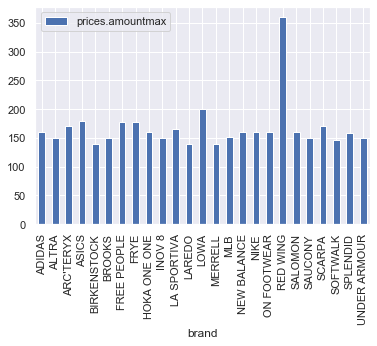

In [245]:
#Price by brand
most_expensive = data_clean.sort_values(by='prices.amountmax', ascending=False).head(100)
plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
most_expensive[['brand','prices.amountmax']].groupby('brand').agg('max').plot(kind='bar')

For more detailed analysis we created 3 more columns.

Column 'Price.stat' contains boolean value 'True' if the shoe price is over 100 or 'False' if the price is under 100

Column 'brand.count' is the number of shoes that brand sold

Column 'price_band' has values 0,1,2. The price of the shoe is <=30 column value 0, >30 and <=100 column value 1 and >100 column value 2.


In [212]:
#creating a new column with boolean values.Shoes priced over $100 is expensive,under 100 is affordable.
data_clean['price.stat']=(data_clean['prices.amountmax']>100)
data_clean.head().T

,0,1,2,3,4
id,AVpfEf_hLJeJML431ueH,AVpi74XfLJeJML43qZAc,AVpi74XfLJeJML43qZAc,AVpjXyCc1cnluZ0-V-Gj,AVphGKLPilAPnD_x1Nrm
dateadded,2015-05-04T12:13:08Z,2017-01-27T01:23:39Z,2017-01-27T01:23:39Z,2017-01-27T01:25:56Z,2017-01-27T01:25:56Z
dateupdated,2018-01-29T04:38:43Z,2018-01-03T05:21:54Z,2018-01-03T05:21:54Z,2018-01-04T11:52:35Z,2018-01-18T03:55:18Z
brand,NATURALIZER,MUK LUKS,MUK LUKS,MUK LUKS,MUK LUKS
categories,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Clothing,Shoes,Women's Shoes,Women's Casual Sh...","Clothing,Shoes,Women's Shoes,Women's Casual Sh...","Clothing,Shoes,Women's Shoes,All Women's Shoes...","Clothing,Shoes,Women's Shoes,All Women's Shoes..."
primarycategories,Shoes,Shoes,Shoes,"Shoes,Shoes",Shoes
imageurls,https://i5.walmartimages.com/asr/861ca6cf-fa55...,https://i5.walmartimages.com/asr/421de5d5-3a74...,https://i5.walmartimages.com/asr/421de5d5-3a74...,https://i5.walmartimages.com/asr/950d38a5-0113...,https://i5.walmartimages.com/asr/5e137bc3-c900...
keys,"naturalizer/47147sc022,017136472311,womensnatu...","mukluks/00173650206,033977045743,muklukswomens...","mukluks/00173650206,033977045743,muklukswomens...","033977045903,muklukswomensdawnsuedescuffslippe...","mukluks/00173660206,033977045958,0033977045958..."
name,Naturalizer Danya Women N/S Open Toe Synthetic...,MUK LUKS Womens Jane Suede Moccasin,MUK LUKS Womens Jane Suede Moccasin,MUK LUKS Womens Dawn Suede Scuff Slipper,MUK LUKS Womens Dawn Suede Scuff Slipper
prices.color,UWomens M Regular,Grey,Grey,Black,Grey


In [213]:
# New column brand count . columnvalue says how many pair of shoes the brand sold
data_clean['brand.count'] = data_clean['brand'].map(data_clean['brand'].value_counts())
data_clean[['brand','brand.count']]

,brand,brand.count
0,NATURALIZER,1
1,MUK LUKS,19
2,MUK LUKS,19
3,MUK LUKS,19
4,MUK LUKS,19
...,...,...
9995,ASICS,130
9996,ASICS,130
9997,KAANAS,1
9998,NIKE,464


In [214]:
affordable=data_clean.sort_values(by='prices.amountmax')
affordable=affordable[['brand','prices.amountmax']].groupby('brand').agg(min)<100 #.filter(filter_max)
affordable.head(20)

,prices.amountmax
brand,
2 LIPS TOO,True
A2 BY AEROSOLES,True
ADIDAS,True
ADIDAS OUTDOOR,True
ALTRA,True
ANDREW GELLER,True
APT. 9,True
ARC'TERYX,False
ASICS,True


In [215]:
brand_price=data_clean.groupby('brand').aggregate(['min', np.median, max])
brand_price.head().T

brand                   2 LIPS TOO A2 BY AEROSOLES  ADIDAS ADIDAS OUTDOOR  \
prices.amountmax min         64.95           59.99   54.99          99.95   
                 median      64.95           69.99   69.99          99.95   
                 max         79.99          109.99  159.95         119.95   
prices.amountmin min         39.99           23.79   32.99          99.95   
                 median      49.99           47.99   64.99          99.95   
                 max         79.99          109.99  159.95         119.95   
prices.amountavg min         52.47           45.74   43.99          99.95   
                 median      57.47           59.99   64.99          99.95   
                 max         79.99          109.99  159.95         119.95   
prices.issale    min         False           False   False          False   
                 median          0               0       0              0   
                 max         False           False    True          False   
price.stat       min         False           False   False          False   
                 median      False           False   False          False   
                 max         False            True    True           True   
brand.count      min            19             670      95              5   
                 median         19             670      95              5   
                 max            19             670      95              5   

brand                     ALTRA  
prices.amountmax min      99.95  
                 median  129.95  
                 max     149.95  
prices.amountmin min      76.96  
                 median  112.46  
                 max     149.95  
prices.amountavg min     93.455  
                 median  129.95  
                 max     149.95  
prices.issale    min      False  
                 median       0  
                 max       True  
price.stat       min      False  
                 median    True  
                 max       True  
brand.count      min         21  
                 median      21  
                 max         21

In [216]:
# creating price band to group the prices in data. price>=30 = 0,price>30 & <=100 =1, price>100 =2
data_clean['price_band']=0
data_clean.loc[data_clean['prices.amountmax']<=30,'price_band']=0
data_clean.loc[(data_clean['prices.amountmax']>30)&(data_clean['prices.amountmax']<=100),'price_band']=1
data_clean.loc[data_clean['prices.amountmax']>100,'price_band']=2
data_clean.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,AVpfEf_hLJeJML431ueH,AVpi74XfLJeJML43qZAc,AVpi74XfLJeJML43qZAc,AVpjXyCc1cnluZ0-V-Gj,AVphGKLPilAPnD_x1Nrm,AVpg91ziilAPnD_xziOo,AVpjGKXyLJeJML43r8BH,AVpjGKXyLJeJML43r8BH,AVpfLXyhilAPnD_xWmNc,AVpfeWdJ1cnluZ0-lXYU
dateadded,2015-05-04T12:13:08Z,2017-01-27T01:23:39Z,2017-01-27T01:23:39Z,2017-01-27T01:25:56Z,2017-01-27T01:25:56Z,2017-01-09T19:38:58Z,2017-01-17T19:09:21Z,2017-01-17T19:09:21Z,2017-01-07T20:51:17Z,2017-01-07T20:51:22Z
dateupdated,2018-01-29T04:38:43Z,2018-01-03T05:21:54Z,2018-01-03T05:21:54Z,2018-01-04T11:52:35Z,2018-01-18T03:55:18Z,2018-10-23T21:26:11Z,2018-10-15T15:50:13Z,2018-10-15T15:50:13Z,2018-01-03T05:22:07Z,2018-01-30T06:18:34Z
brand,NATURALIZER,MUK LUKS,MUK LUKS,MUK LUKS,MUK LUKS,SOFT ONES,MUK LUKS,MUK LUKS,MUK LUKS,MUK LUKS
categories,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Clothing,Shoes,Women's Shoes,Women's Casual Sh...","Clothing,Shoes,Women's Shoes,Women's Casual Sh...","Clothing,Shoes,Women's Shoes,All Women's Shoes...","Clothing,Shoes,Women's Shoes,All Women's Shoes...","Womens Shoes,Clothing,Women's Shoes,Baby & Kid...","MUK LUKS,Womens,Women's Casual Shoes,Clothing,...","MUK LUKS,Womens,Women's Casual Shoes,Clothing,...","Clothing,Shoes,Women's Shoes,All Women's Shoes","Clothing,Shoes,Women's Shoes,Women's Winter Bo..."
primarycategories,Shoes,Shoes,Shoes,"Shoes,Shoes",Shoes,Shoes,Shoes,Shoes,Shoes,Shoes
imageurls,https://i5.walmartimages.com/asr/861ca6cf-fa55...,https://i5.walmartimages.com/asr/421de5d5-3a74...,https://i5.walmartimages.com/asr/421de5d5-3a74...,https://i5.walmartimages.com/asr/950d38a5-0113...,https://i5.walmartimages.com/asr/5e137bc3-c900...,https://i5.walmartimages.com/asr/7b979ba6-fa0a...,https://i5.walmartimages.com/asr/53c04329-c04e...,https://i5.walmartimages.com/asr/53c04329-c04e...,https://i5.walmartimages.com/asr/33997517-2082...,https://i5.walmartimages.com/asr/bc1be340-3afc...
keys,"naturalizer/47147sc022,017136472311,womensnatu...","mukluks/00173650206,033977045743,muklukswomens...","mukluks/00173650206,033977045743,muklukswomens...","033977045903,muklukswomensdawnsuedescuffslippe...","mukluks/00173660206,033977045958,0033977045958...","033977052222,muklukssockmonkeyslipperbrowntwee...","womensclogwithfurlining/556122745,033977172555...","womensclogwithfurlining/556122745,033977172555...","mukluks/0003397713227,reliableofmilwuakee/0003...","muklukswomensmalenaboot/554233887,033977132542..."
name,Naturalizer Danya Women N/S Open Toe Synthetic...,MUK LUKS Womens Jane Suede Moccasin,MUK LUKS Womens Jane Suede Moccasin,MUK LUKS Womens Dawn Suede Scuff Slipper,MUK LUKS Womens Dawn Suede Scuff Slipper,Women's MUK LUKS¬Æ Soft Ones Sock Money Slippers,Women's MUK LUKS¬Æ Faux Suede Clogs,Women's MUK LUKS¬Æ Faux Suede Clogs,MUK LUKS Women's Malena Boot,MUK LUKS Women's Malena Boot
prices.color,UWomens M Regular,Grey,Grey,Black,Grey,Brown Tweed,Purple,Brown,Navy,Brown


In [218]:
# checking the value counts in price_band
data_clean['price_band'].value_counts()*100/len(data_clean)

1    94.21
2     3.74
0     2.05
Name: price_band, dtype: float64

Label Encoding

In [219]:
# Converting the boolean values to 0,1 using .astype()
data_clean[['prices.issale','price.stat']] = data_clean[['prices.issale','price.stat']].astype('int')
data_clean.dtypes

id                    object
dateadded             object
dateupdated           object
brand                 object
categories            object
primarycategories     object
imageurls             object
keys                  object
name                  object
prices.color          object
prices.currency       object
prices.dateseen       object
prices.size           object
prices.sourceurls     object
sizes                 object
sourceurls            object
prices.amountmax     float64
prices.amountmin     float64
prices.amountavg     float64
prices.issale          int32
price.stat             int32
brand.count            int64
price_band             int64
dtype: object

In [220]:


#Encode the brand values which are strings to integers.
from sklearn.preprocessing import LabelEncoder

lb_brand = LabelEncoder()
data_clean['brand_code'] = lb_brand.fit_transform(data_clean['brand'])
data_clean[['brand', 'brand_code']].head(10)



,brand,brand_code
0,NATURALIZER,66
1,MUK LUKS,64
2,MUK LUKS,64
3,MUK LUKS,64
4,MUK LUKS,64
5,SOFT ONES,95
6,MUK LUKS,64
7,MUK LUKS,64
8,MUK LUKS,64
9,MUK LUKS,64


In [222]:
data_clean.columns

Index(['id', 'dateadded', 'dateupdated', 'brand', 'categories',
       'primarycategories', 'imageurls', 'keys', 'name', 'prices.color',
       'prices.currency', 'prices.dateseen', 'prices.size',
       'prices.sourceurls', 'sizes', 'sourceurls', 'prices.amountmax',
       'prices.amountmin', 'prices.amountavg', 'prices.issale', 'price.stat',
       'brand.count', 'price_band', 'brand_code'],
      dtype='object')

In [224]:
lb_brand = LabelEncoder()
data_clean['colors_code'] = lb_brand.fit_transform(data_clean['prices.color'])
data_clean[['prices.color', 'colors_code']].head(10)

,prices.color,colors_code
0,UWomens M Regular,505
1,Grey,281
2,Grey,281
3,Black,24
4,Grey,281
5,Brown Tweed,150
6,Purple,419
7,Brown,141
8,Navy,360
9,Brown,141


Outliers

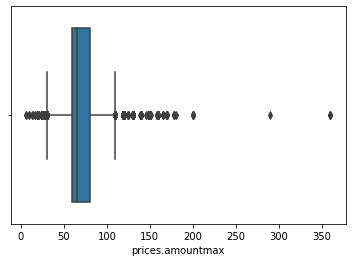

In [227]:
sn.boxplot(data_clean['prices.amountmax'])

Creating new data frame for machine learning model

In [335]:
shoedf =data_clean[['brand','prices.amountmax', 'prices.amountmin','prices.issale','price.stat','brand.count','price_band','brand_code','colors_code']]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text xticklabel objects>)

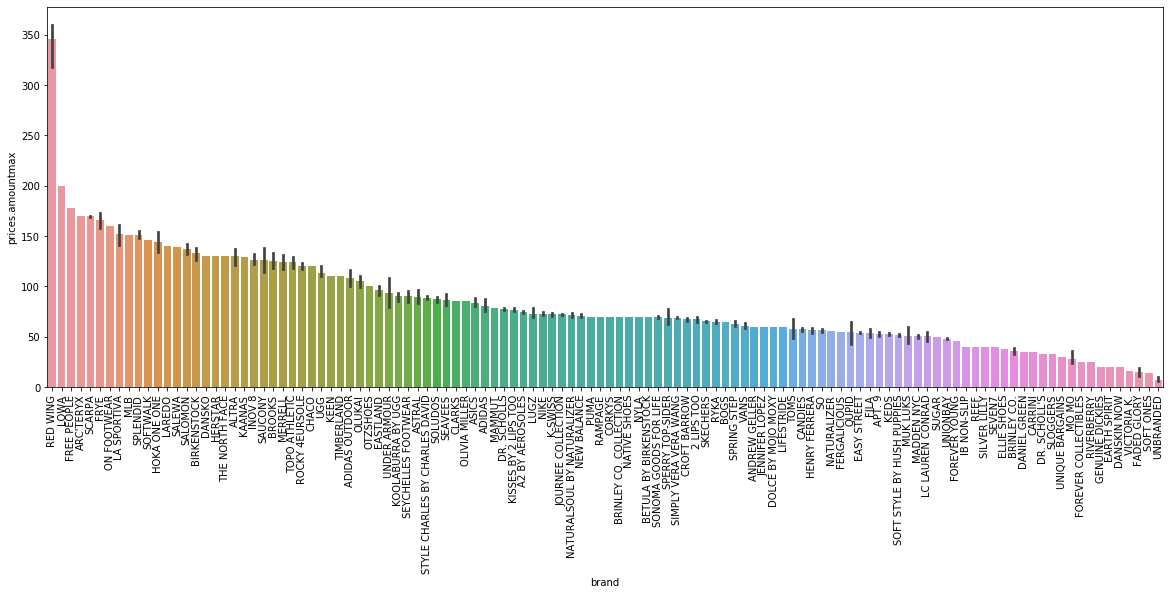

In [230]:
#Plot of average price by brand.
df = pd.DataFrame({col:vals['prices.amountmax'] for col,vals in shoedf.groupby('brand')})
mean = df.mean()
mean.sort_values(ascending=False, inplace=True)

fig1, ax1 = plt.subplots(figsize = (20,7))
chart = sn.barplot(x='brand',y='prices.amountmax', data=shoedf, order=mean.index, ax = ax1)
plt.xticks(rotation = 90)
plt.show()

C:\Users\mithu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



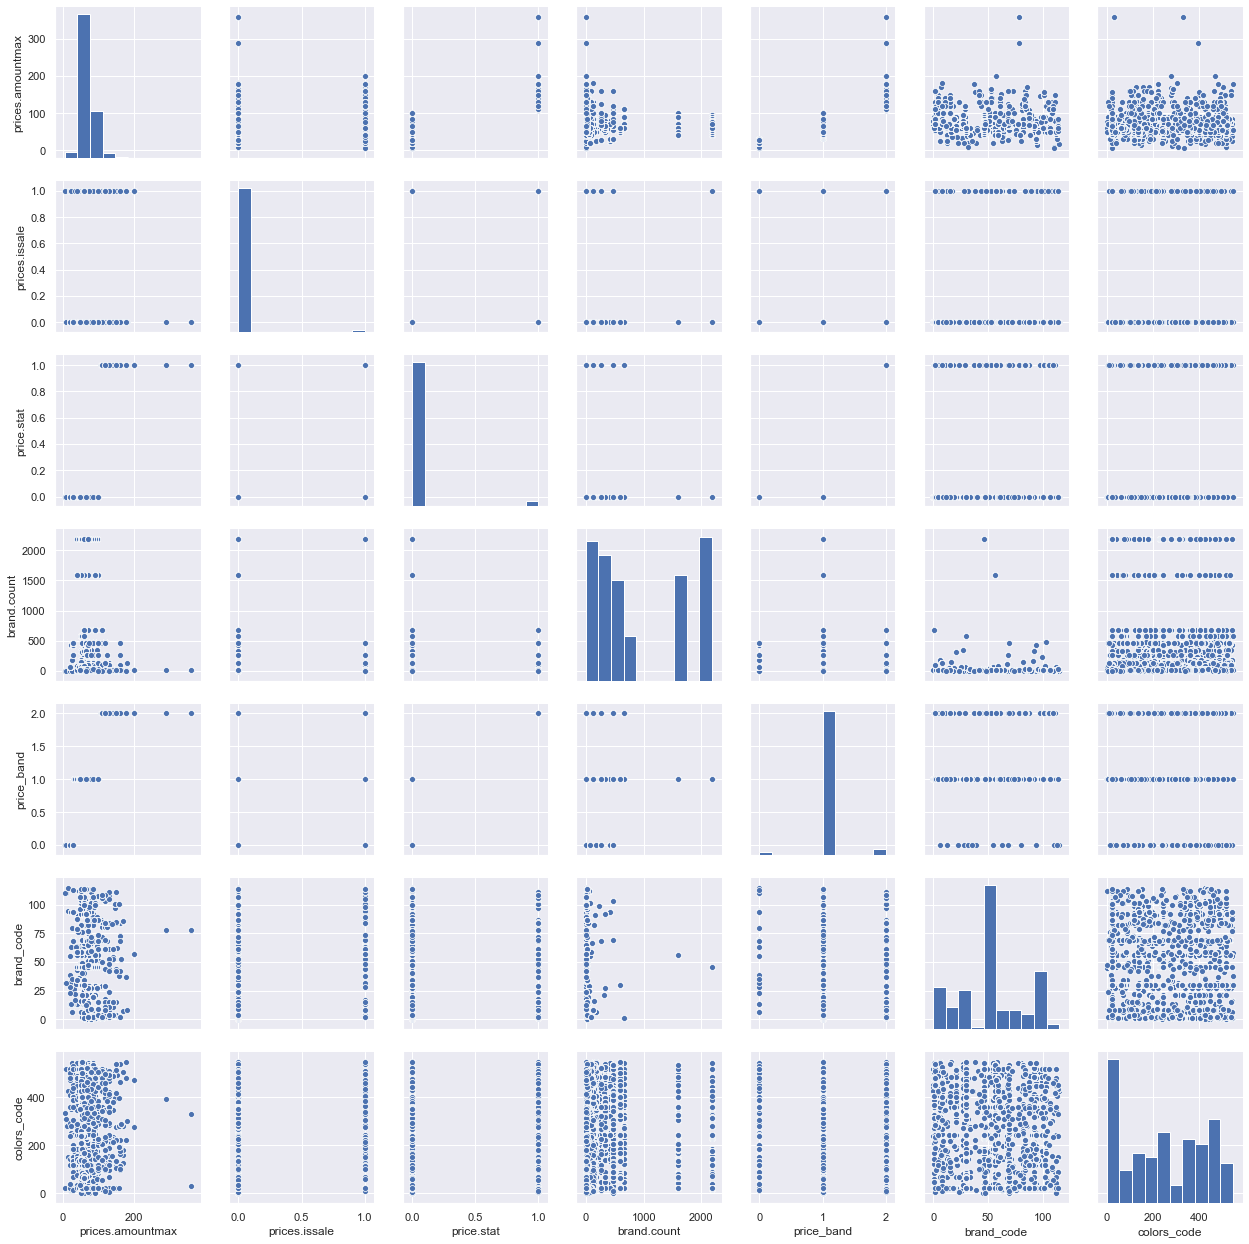

In [231]:
## PAirplots
sn.set()
sn.pairplot(shoedf, size = 2.5)
plt.show();

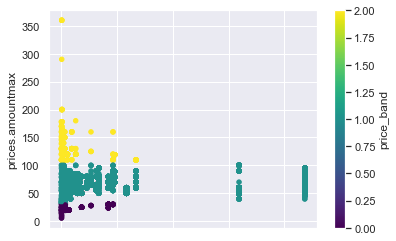

In [232]:
shoedf.plot.scatter(x='brand.count',y='prices.amountmax',c='price_band', colormap='viridis')

ABove plots show most of the shoes are sold in the price range of 30$ - 100$

SPlit the data into train and test

In [336]:
# New df to split data contains only numerical values.
newdf=shoedf[['brand','prices.amountmax', 'prices.amountmin', 'prices.issale','price.stat','brand.count','price_band','colors_code','brand_code']]
X = np.array(newdf.iloc[:,1:7])
y = np.array(newdf['brand_code'])

In [234]:
#Creating training and test splits(The code splits the dataset into 70% train data and 30% test data)
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [235]:
#Feature scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

USe multiple algorithms and accuracy as the metric

In [236]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [240]:
import warnings
warnings.filterwarnings('ignore')

In [241]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.486571 (0.028744)
LDA: 0.967571 (0.005385)
CART: 0.993571 (0.003628)
NB: 0.987857 (0.002945)
SVM: 0.633000 (0.012230)


Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c3ac7b1788>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3ac7b1e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3ac7aafc8>,
 'medians': [<matplotlib.lines.Line2D at 0x1c3ac7b6d88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c3ac7b6ec8>,
 'means': []}

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

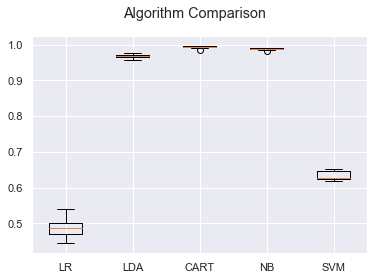

In [242]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [249]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
predictions_cart = cart.predict(X_test)
print(accuracy_score(y_test, predictions_cart))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.9933333333333333


In [250]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions_lda = lda.predict(X_test)
print(accuracy_score(y_test, predictions_lda))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

0.965


In [251]:
nb = GaussianNB()
nb.fit(X_train, y_train)
predictions_nb = nb.predict(X_test)
print(accuracy_score(y_test, predictions_nb))

GaussianNB(priors=None, var_smoothing=1e-09)

0.99


In [296]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
print(accuracy_score(y_test, predictions_rf))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9876666666666667


Feature ranking:
1. feature 3 (0.804699)
2. feature 0 (0.178112)
3. feature 4 (0.008334)
4. feature 1 (0.005513)
5. feature 2 (0.003342)


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x1c3b3469a08>,
 <a list of 5 Text xticklabel objects>)

(-1, 5)

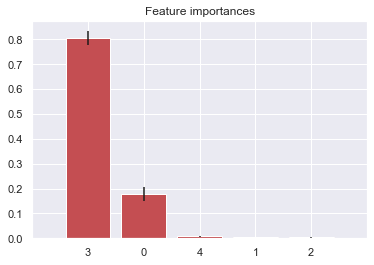

In [298]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [301]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [284]:
dis_brand = data_clean[data_clean['prices.issale']==1]['brand']

In [287]:
dis_brands = dis_brand.value_counts().to_frame().reset_index().rename(columns={'index':'brand', 'brand':'volume'})
dis_brands

,brand,volume
0,BRINLEY CO.,24
1,ADIDAS,17
2,SALOMON,14
3,MUK LUKS,13
4,NIKE,13
5,ALTRA,10
6,INOV 8,9
7,SPLENDID,7
8,MERRELL,7
9,LOWA,7


In [294]:
dis_brands.iplot(
    kind='bar',
    x = 'brand',
    y = 'volume',
    linecolor='black',
    title='Brand vs Discounts', yTitle = 'No.of Products',
    color = 'blue'
    )

In [384]:
newdf1 = newdf.drop(['brand_code', 'colors_code'], axis=1)


In [386]:
newdf1['colors'] = data_clean['prices.color']
newdf1

,brand,prices.amountmax,prices.amountmin,prices.issale,price.stat,brand.count,price_band,colors
0,NATURALIZER,55.99,55.99,0,0,1,1,UWomens M Regular
1,MUK LUKS,47.00,35.25,1,0,19,1,Grey
2,MUK LUKS,35.25,35.25,0,0,19,1,Grey
3,MUK LUKS,24.75,24.75,0,0,19,0,Black
4,MUK LUKS,33.00,30.39,1,0,19,1,Grey
...,...,...,...,...,...,...,...,...
9995,ASICS,119.95,89.96,1,1,130,2,Silver/Pistachio/Pink
9996,ASICS,119.95,77.97,1,1,130,2,Indigo Blue/Silver/Prune
9997,KAANAS,128.95,64.47,1,1,1,2,Mauve
9998,NIKE,119.95,89.96,1,1,464,2,Armory Blue/Armory Navy-Cirrus Blue


In [387]:
seg = KPrototypes(n_clusters=6, init = 'Cao')
clusters_kmodes = seg.fit_predict(newdf1, categorical=[0,7])

In [394]:
newdf1['clusters'] = clusters_kmodes

In [395]:
segment1 = newdf1[newdf1.clusters==0]
segment2 = newdf1[newdf1.clusters==1]
segment3 = newdf1[newdf1.clusters==2]
segment4 = newdf1[newdf1.clusters==3]
segment5 = newdf1[newdf1.clusters==4]
segment6 = newdf1[newdf1.clusters==5]

In [404]:
segment6.brand.value_counts()

STYLE CHARLES BY CHARLES DAVID    478
NIKE                              464
SO                                422
Name: brand, dtype: int64

In [430]:
print(segment5.brand.value_counts()[:10])
print(segment5.price_band.value_counts())
print(segment5['prices.issale'].value_counts())
print(segment5['colors'].value_counts()[:5])
print(segment5['prices.amountmax'].mean())
print(segment5['prices.amountmin'].mean())

A2 BY AEROSOLES    670
EASY STREET        585
Name: brand, dtype: int64
1    1239
2      16
Name: price_band, dtype: int64
0    1255
Name: prices.issale, dtype: int64
Black           199
Navy             96
Tan              78
Black Fabric     63
Brown            62
Name: colors, dtype: int64
64.90633466135513
50.3442231075691


In [1]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/saimithun-95/women-shoe-prices3


'https://jovian.ai/saimithun-95/women-shoe-prices3'